## **Data Preparation and Preprocessing :-** 

In [40]:
import numpy as np
import tensorflow as tf
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [41]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ",len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPUs Available:  1


In [42]:
train_labels=[]
train_samples=[]

#### Example data : 
- An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial.
- The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.
- Around 95% of patients 65 or older experienced side effects.
- Around 95% of patients under 65 experienced no side effects


In [43]:
for i in range(50):
# 5% of young individuals who experienced side effects.
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

# 5% of old individuals who didn't experience side effects.
  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
# 95% of young individuals who experienced side effects.
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

# 95% of old individuals who didn't experience side effects.
  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)


In [44]:
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels,train_samples=shuffle(train_labels,train_samples)

In [45]:
# train_labels, train_samples
np.shape(train_samples)

(2100,)

In [46]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))

In [47]:
np.shape(scaled_train_samples)

(2100, 1)

In [48]:
scaled_train_samples

array([[0.42528736],
       [0.14942529],
       [0.66666667],
       ...,
       [0.73563218],
       [0.65517241],
       [0.86206897]])

## **Building a Sequential Model :-**

In [49]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ",len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPUs Available:  1


In [50]:
model=tf.keras.Sequential(
    [
     tf.keras.layers.Dense(units=16,input_shape=(1,),activation='relu'),
     tf.keras.layers.Dense(units=32,activation='relu'),
     tf.keras.layers.Dense(units=2,activation='softmax')
     ]
)
  



In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## **Training the Model :-**

In [52]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
loss=tf.keras.losses.sparse_categorical_crossentropy
metrics=['accuracy']

In [53]:
model.compile(optimizer=optimizer,loss=loss,metrics=metrics)

In [54]:
model.fit(x=scaled_train_samples,y=train_labels,validation_split=0.1,batch_size=10,epochs=100, shuffle=True, verbose=2)

Epoch 1/100
189/189 - 1s - loss: 0.6402 - accuracy: 0.5550 - val_loss: 0.6474 - val_accuracy: 0.5333 - 1s/epoch - 7ms/step
Epoch 2/100
189/189 - 1s - loss: 0.6206 - accuracy: 0.6217 - val_loss: 0.6300 - val_accuracy: 0.6143 - 810ms/epoch - 4ms/step
Epoch 3/100
189/189 - 1s - loss: 0.6010 - accuracy: 0.6757 - val_loss: 0.6119 - val_accuracy: 0.6476 - 661ms/epoch - 3ms/step
Epoch 4/100
189/189 - 1s - loss: 0.5807 - accuracy: 0.7053 - val_loss: 0.5920 - val_accuracy: 0.6810 - 639ms/epoch - 3ms/step
Epoch 5/100
189/189 - 1s - loss: 0.5593 - accuracy: 0.7418 - val_loss: 0.5706 - val_accuracy: 0.7286 - 610ms/epoch - 3ms/step
Epoch 6/100
189/189 - 1s - loss: 0.5365 - accuracy: 0.7815 - val_loss: 0.5487 - val_accuracy: 0.7524 - 624ms/epoch - 3ms/step
Epoch 7/100
189/189 - 1s - loss: 0.5130 - accuracy: 0.8058 - val_loss: 0.5243 - val_accuracy: 0.7857 - 572ms/epoch - 3ms/step
Epoch 8/100
189/189 - 1s - loss: 0.4887 - accuracy: 0.8259 - val_loss: 0.4994 - val_accuracy: 0.8095 - 672ms/epoch - 4ms/

## **Creating Test set for Inference :-**

In [55]:
test_labels=[]
test_samples=[]

In [56]:
for i in range(10):
# 5% of young individuals who experienced side effects.
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

# 5% of old individuals who didn't experience side effects.
  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
# 95% of young individuals who experienced side effects.
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

# 95% of old individuals who didn't experience side effects.
  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)


In [57]:
test_labels=np.array(test_labels)
test_samples=np.array(test_samples)
test_labels,test_samples=shuffle(test_labels,test_samples)

In [58]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_test_samples=scaler.fit_transform(test_samples.reshape(-1,1))

In [59]:
scaled_test_samples

array([[0.1954023 ],
       [0.37931034],
       [0.14942529],
       [0.85057471],
       [0.3908046 ],
       [0.16091954],
       [0.05747126],
       [0.75862069],
       [0.65517241],
       [0.17241379],
       [0.06896552],
       [0.67816092],
       [0.43678161],
       [0.35632184],
       [0.91954023],
       [0.71264368],
       [0.20689655],
       [0.10344828],
       [0.6091954 ],
       [0.75862069],
       [0.57471264],
       [0.97701149],
       [0.        ],
       [0.14942529],
       [0.67816092],
       [0.37931034],
       [0.90804598],
       [0.88505747],
       [0.97701149],
       [0.40229885],
       [0.85057471],
       [0.93103448],
       [0.45977011],
       [0.59770115],
       [0.34482759],
       [0.57471264],
       [0.83908046],
       [0.24137931],
       [0.02298851],
       [0.08045977],
       [0.31034483],
       [0.45977011],
       [0.57471264],
       [0.85057471],
       [0.11494253],
       [0.66666667],
       [0.8045977 ],
       [0.666

## **Prediction :-**

In [60]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [61]:
for i in predictions:
  print(i)

[0.9694426  0.03055746]
[0.94455796 0.05544201]
[0.9694426  0.03055746]
[0.03142881 0.9685712 ]
[0.9399617  0.06003831]
[0.9694426  0.03055746]
[0.9694426  0.03055746]
[0.07253164 0.92746836]
[0.17405076 0.82594925]
[0.9694426  0.03055746]
[0.9694426  0.03055746]
[0.14445971 0.8555402 ]
[0.9177709  0.08222908]
[0.9511154  0.04888456]
[0.01649863 0.9835014 ]
[0.10826323 0.8917368 ]
[0.9694426  0.03055746]
[0.9694426  0.03055746]
[0.34034228 0.6596577 ]
[0.07253164 0.92746836]
[0.5040143 0.4959857]
[0.00958779 0.9904122 ]
[0.9694426  0.03055746]
[0.9694426  0.03055746]
[0.14445971 0.8555402 ]
[0.94455796 0.05544201]
[0.01838102 0.981619  ]
[0.02279915 0.97720087]
[0.00958779 0.9904122 ]
[0.93501055 0.06498943]
[0.03142881 0.9685712 ]
[0.01480609 0.9851939 ]
[0.9023442  0.09765571]
[0.39273584 0.60726416]
[0.9539829  0.04601712]
[0.5040143 0.4959857]
[0.03495413 0.96504587]
[0.9694426  0.03055746]
[0.9694426  0.03055746]
[0.9694426  0.03055746]
[0.9616541  0.03834588]
[0.9023442  0.097655

In [62]:
rounded_predictions=np.argmax(predictions,axis=-1)

In [63]:
for i in rounded_predictions:
  print(i)

0
0
0
1
0
0
0
1
1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
1
1
1
0
1
1
0
1
0
0
1
0
0
0
0
0
0
1
0
1
1
1
1
1
0
0
1
1
0
1
1
1
0
1
0
1
0
0
1
1
0
1
0
1
1
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
1
1
0
1
0
0
0
0
0
0
1
1
0
1
0
1
1
1
1
0
0
0
0
0
1
0
1
0
1
1
1
0
1
1
1
1
0
0
1
1
0
1
0
0
1
1
1
1
0
1
0
0
1
1
0
1
1
1
1
1
1
1
1
0
1
1
0
1
1
0
0
0
0
1
0
0
0
1
1
1
1
0
0
0
0
1
0
0
1
1
0
1
0
1
0
0
1
1
0
0
1
1
0
1
1
1
1
0
0
0
0
0
1
1
0
0
0
1
0
1
1
0
1
0
0
1
1
1
0
0
0
1
1
1
1
1
0
1
1
1
0
0
0
1
1
0
0
1
1
1
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
1
0
0
0
1
1
1
1
1
0
1
1
0
1
0
1
0
0
0
1
1
1
1
1
0
0
1
0
1
0
1
0
1
0
1
1
0
1
1
1
0
0
1
1
0
0
1
1
0
0
1
1
0
1
0
1
0
1
1
0
1
0
1
1
1
0
0
1
1
0
0
0
0
1
0
0
1
0
1
1
1
0
1
1
0
1
1
1
0
0
0
0
0
1
1
1
1
1
1
1
0
0
1
1
0
0
1
1
0
1
0
0
0
1
1
1
1
0
1
1
1
0
1
0
0
1
0
0
0
1
1
1
1
1
0
1
0
1
0
0
0
1
1
0
0
0
1
1
1
0
0
0
0
1
0
1


## **Creating Confusion Matrix :-**

In [64]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
import matplotlib.pyplot as plt

In [65]:
cm = confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [66]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize :
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else :
    print('Confusion Matrix, without normalization')

  print(cm)
  thresh=cm.max()/2.

  for i, j in itertools.product(range(cm.shape[0]),cm.shape[1]):
    plt.text(j,i,cm[i,j],
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')



In [67]:
cm_plot_labels = ['no_side_effects','had_side_effects']
#plot_confusion_matrix(cm=cm, classes=cm_plot_labels,title='Confusion Matrix)

In [68]:
matrix=confusion_matrix(test_labels,rounded_predictions)

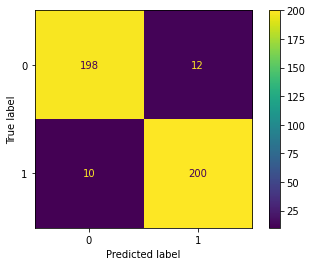

In [69]:
disp= ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
plt.show()

## **Save and Load Model :-**

### 1. model.save()

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.save('./')

INFO:tensorflow:Assets written to: ./assets


### This save function saves:
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss,optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.


In [72]:
new_model=tf.keras.models.load_model('./')

In [73]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


We can see that the model has the same weights.

In [74]:
model.get_weights()

[array([[-0.37215066, -0.48415968, -0.4833631 , -0.17888108, -0.5092175 ,
         -0.3453076 , -0.20497927,  0.3680703 , -0.5895015 ,  0.4411053 ,
         -0.22524977,  0.74420357,  0.6905759 , -0.50381744, -0.01678103,
         -0.17672458]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.1714111 ,  0.        , -0.16590118,
         0.        , -0.19776022, -0.18599626,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 2.10479647e-01, -4.59423363e-02, -1.14751115e-01,
          2.80036062e-01, -1.33161694e-01,  3.21049899e-01,
          2.23927706e-01,  3.05248708e-01, -2.20494270e-01,
         -4.69651520e-02, -2.30783999e-01, -8.48335028e-02,
         -3.37595314e-01, -3.28566879e-01, -3.52978706e-03,
          5.06458580e-02, -2.10782960e-01, -9.59135890e-02,
         -1.18408874e-01, -1.50549725e-01, -1.45628661e-01,
         -1.05616540e-01, -1.00672394e-01, -1.85514331e-01,
 

In [75]:
new_model.get_weights()

[array([[-0.37215066, -0.48415968, -0.4833631 , -0.17888108, -0.5092175 ,
         -0.3453076 , -0.20497927,  0.3680703 , -0.5895015 ,  0.4411053 ,
         -0.22524977,  0.74420357,  0.6905759 , -0.50381744, -0.01678103,
         -0.17672458]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.1714111 ,  0.        , -0.16590118,
         0.        , -0.19776022, -0.18599626,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 2.10479647e-01, -4.59423363e-02, -1.14751115e-01,
          2.80036062e-01, -1.33161694e-01,  3.21049899e-01,
          2.23927706e-01,  3.05248708e-01, -2.20494270e-01,
         -4.69651520e-02, -2.30783999e-01, -8.48335028e-02,
         -3.37595314e-01, -3.28566879e-01, -3.52978706e-03,
          5.06458580e-02, -2.10782960e-01, -9.59135890e-02,
         -1.18408874e-01, -1.50549725e-01, -1.45628661e-01,
         -1.05616540e-01, -1.00672394e-01, -1.85514331e-01,
 

### 2. model.to_json()

If you only need to save the architecture of a model, not its weights or its training configuration, you can use the following function to save the architecture only.

In [76]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [77]:
# model reconstruction
model_architecture = tf.keras.models.model_from_json(json_string)

In [78]:
model_architecture.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3. model.save_weights()